In [3]:
import seaborn as sns
import pandas as pandas
df=sns.load_dataset('taxis')
print(df.describe())
print(df.shape)
print(df.info())
df.columns



                              pickup                        dropoff  \
count                           6433                           6433   
mean   2019-03-16 08:31:28.514223616  2019-03-16 08:45:49.491217408   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:50:34            2019-03-08 16:12:51   
50%              2019-03-15 21:46:58            2019-03-15 22:06:44   
75%              2019-03-23 17:41:38            2019-03-23 17:51:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.00000

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [4]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [5]:
df.describe(include='object')

,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6389,6407,6388,6407,6388
unique,2,2,194,203,4,5
top,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,5451,4577,230,245,5268,5206


In [6]:
(df.isna().sum()/df.shape[0])*100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

In [7]:
df.shape[0]-df.dropna().shape[0]

92

In [8]:
df.dropna(inplace=True)          # OK (but returns None) [web:27]
df.reset_index(drop=True, inplace=True)
print(df.shape)


(6341, 14)


In [9]:
df.tip.value_counts()

tip
0.00    2244
1.00     312
2.00     211
2.16      89
1.86      79
        ... 
1.49       1
3.99       1
0.92       1
2.71       1
6.62       1
Name: count, Length: 481, dtype: int64

In [10]:
df.color.value_counts()

color
yellow    5373
green      968
Name: count, dtype: int64

<Axes: xlabel='color', ylabel='tip'>

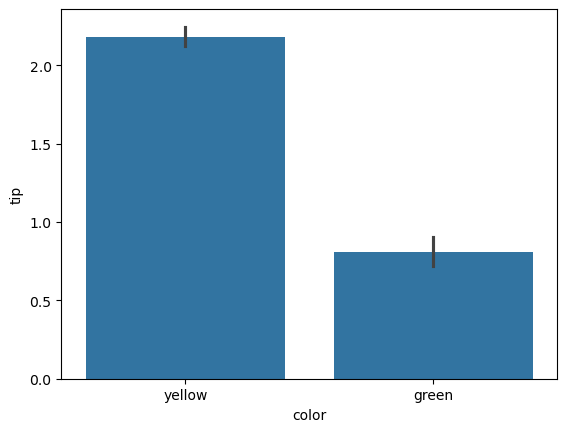

In [11]:
sns.barplot(x=df.color,y=df.tip,estimator='mean')

<Axes: xlabel='color', ylabel='tip'>

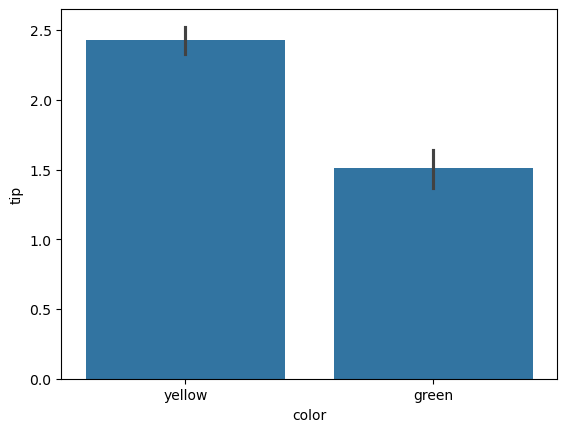

In [12]:
sns.barplot(x=df.color,y=df.tip,estimator='std')

In [13]:
df.color.value_counts()

color
yellow    5373
green      968
Name: count, dtype: int64

<Axes: xlabel='tip', ylabel='Count'>

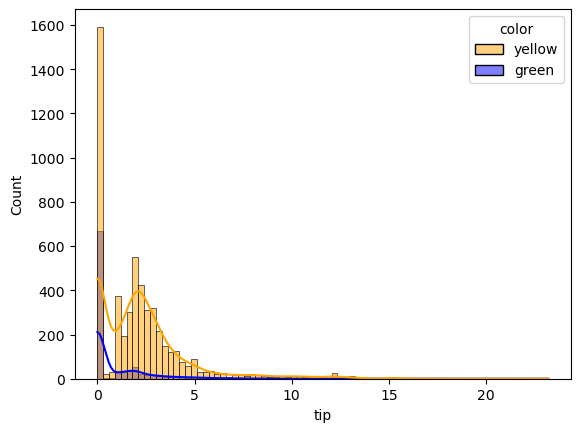

In [14]:
sns.histplot(x=df.tip,hue=df.color,kde=True,palette={'yellow':'orange','green':'blue'})

<Axes: xlabel='color', ylabel='tip'>

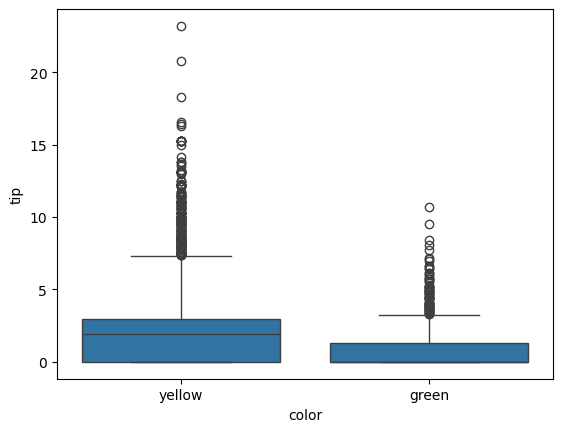

In [15]:
sns.boxplot(x=df.color,y=df.tip)

In [16]:
# Independent T-Test
import scipy.stats as stats
yellow_tip=df['tip'][df['color']=='yellow']
green_tip=df['tip'][df['color']=='green']



In [17]:
green_tip.shape

(968,)

In [18]:
yellow_tip.shape

(5373,)

In [19]:
t_stat,p_val=stats.ttest_ind(yellow_tip,green_tip)
print("Independent T-Test statistic:",t_stat)
print("P-value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by color")
else:
  print("Fail to reject null hypothesis: No significant tip difference by color")

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis:tip differs by color


In [20]:

df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [21]:
df.payment.value_counts()

payment
credit card    4546
cash           1795
Name: count, dtype: int64

<Axes: xlabel='payment', ylabel='tip'>

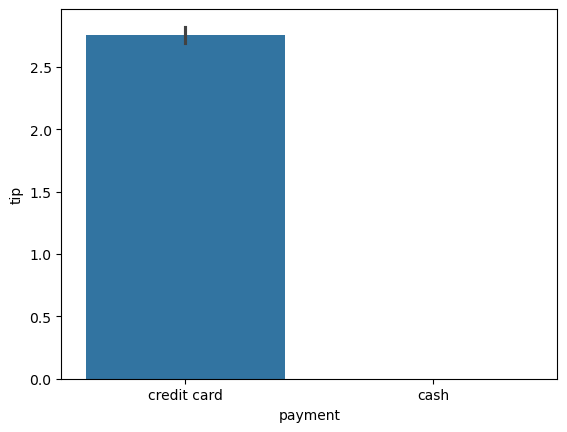

In [22]:
sns.barplot(x=df.payment,y=df.tip,estimator='mean')

<Axes: xlabel='payment', ylabel='tip'>

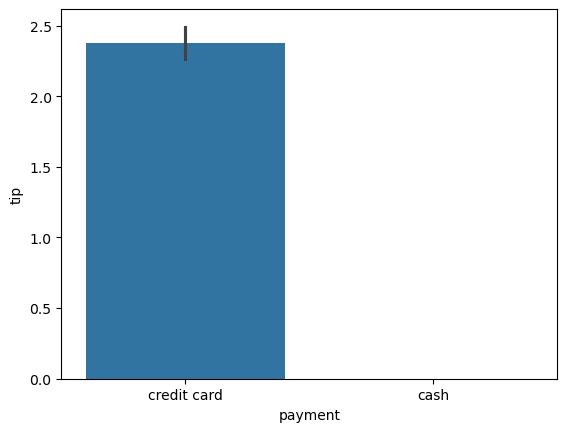

In [23]:
sns.barplot(x=df.payment,y=df.tip,estimator='std')

<Axes: xlabel='tip', ylabel='Count'>

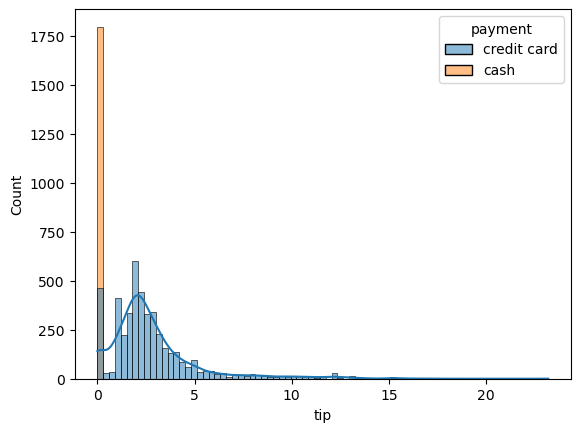

In [24]:
sns.histplot(x=df.tip,hue=df.payment,kde=True)

In [25]:
credit_tip=df['tip'][df['payment']=='credit card']
cash_tip=df['tip'][df['payment']=='cash']
t_stat,p_val=stats.ttest_ind(credit_tip,cash_tip)
print("Independent T-Test statistic:",t_stat)
print("P-value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by payment")
else:
  print("Fail to reject null hypothesis: No significant tip difference by payment")

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis:tip differs by payment


In [26]:
# Customers tend to tip more when they pay by credit card compared to cash.

# Tips are generally higher for credit card payments, while cash payments usually have lower average tips.

In [27]:
df.pickup_zone.value_counts()

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
                               ... 
Ozone Park                        1
Glendale                          1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: int64

<Axes: xlabel='pickup_zone', ylabel='tip'>

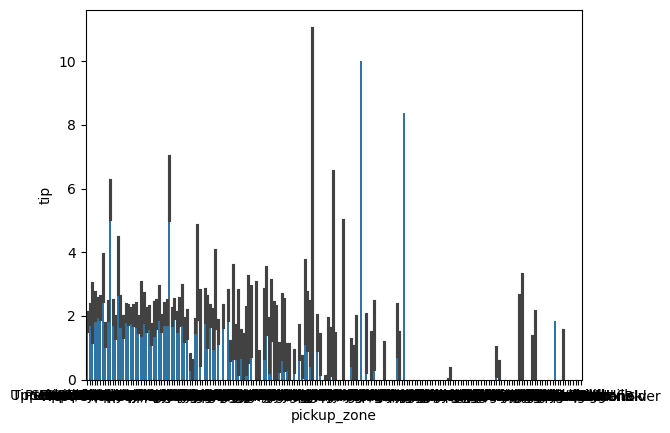

In [28]:
sns.barplot(x=df.pickup_zone,y=df.tip,estimator='mean')

In [29]:
df['pickup_borough'].value_counts()

pickup_borough
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: count, dtype: int64

In [30]:
df['pickup_borough'].unique()

array(['Manhattan', 'Queens', 'Bronx', 'Brooklyn'], dtype=object)

<Axes: xlabel='pickup_borough', ylabel='count'>

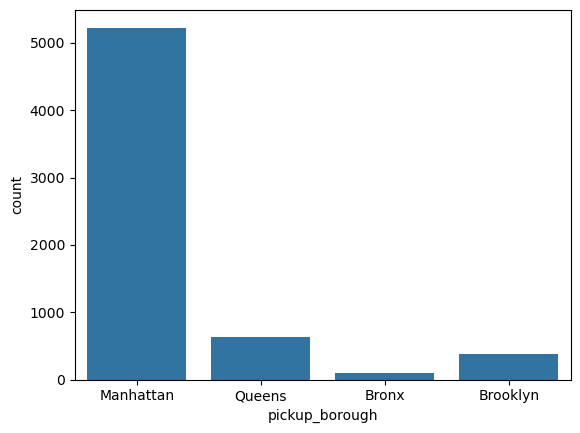

In [31]:
sns.countplot(x=df['pickup_borough'])

C:\Users\dobil\AppData\Local\Temp\ipykernel_22292\3577605233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='mean')


<Axes: xlabel='pickup_borough', ylabel='tip'>

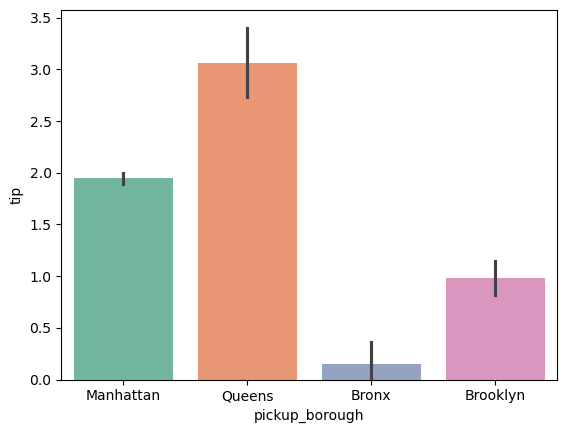

In [32]:
sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='mean')

C:\Users\dobil\AppData\Local\Temp\ipykernel_22292\22238045.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='std')


<Axes: xlabel='pickup_borough', ylabel='tip'>

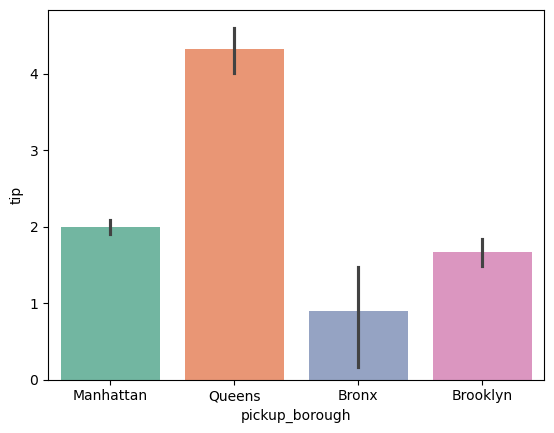

In [33]:
sns.barplot(x=df.pickup_borough,y=df.tip,palette='Set2',estimator='std')

In [34]:
df['tip'].groupby(df['pickup_borough']).mean()

pickup_borough
Bronx        0.148586
Brooklyn     0.979127
Manhattan    1.945597
Queens       3.066458
Name: tip, dtype: float64

In [35]:
df['tip'].groupby(df['pickup_borough']).std()

pickup_borough
Bronx        0.897261
Brooklyn     1.674487
Manhattan    1.997736
Queens       4.323951
Name: tip, dtype: float64

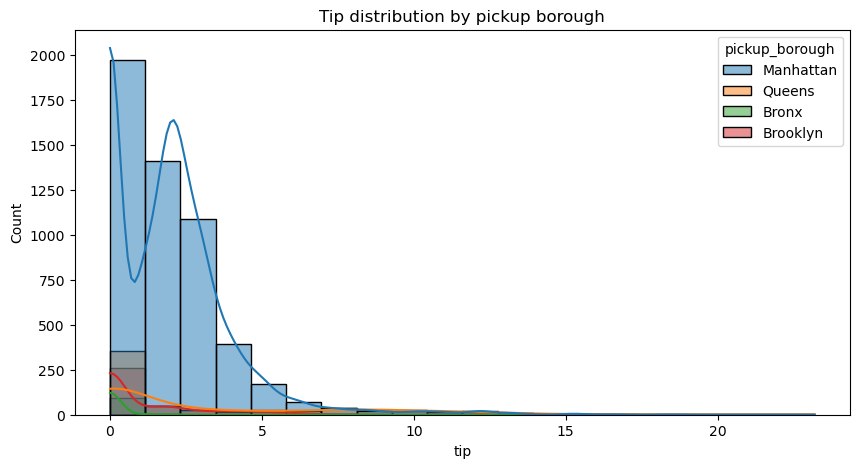

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="tip", hue="pickup_borough", bins=20, kde=True, )
plt.title("Tip distribution by pickup borough")
plt.show()

<Axes: xlabel='pickup_borough', ylabel='tip'>

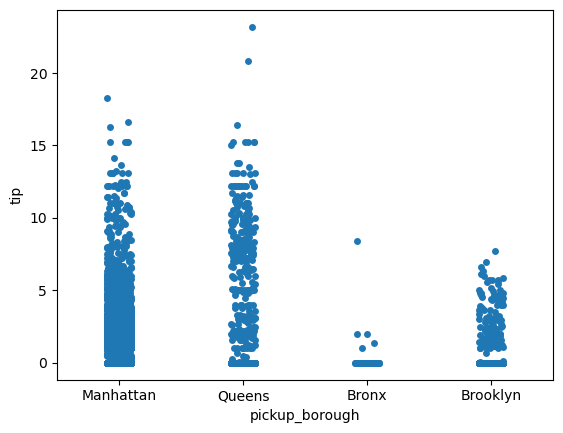

In [37]:

sns.stripplot(x='pickup_borough',y='tip',data=df)

In [38]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("P value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by borough")
else:
  print("Fail to reject null hypothesis: No significant tip difference by borough")

P value: 5.155109332424193e-58
Reject null hypothesis:tip differs by borough


In [39]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # Prepare data
# spending_scores = data['Spending_Score']
# regions = data['Region']
#h0=distribution of group 1= group 2
#h1=distribution of g1 is not equal to group 2

# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_borough, alpha=0.05)
print(tukey_result)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


<Axes: xlabel='dropoff_borough', ylabel='count'>

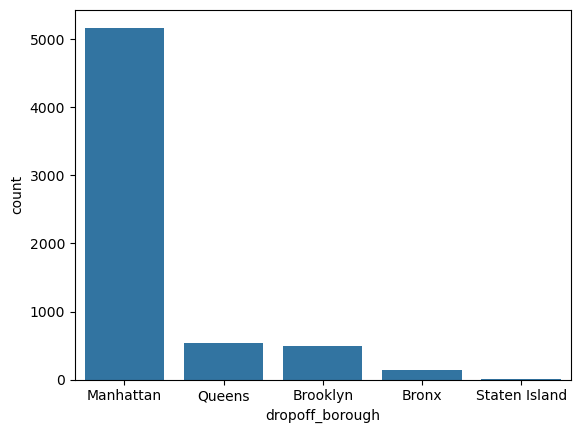

In [40]:
sns.countplot(x=df['dropoff_borough'])

C:\Users\dobil\AppData\Local\Temp\ipykernel_22292\705138468.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2',estimator='std')


<Axes: xlabel='dropoff_borough', ylabel='tip'>

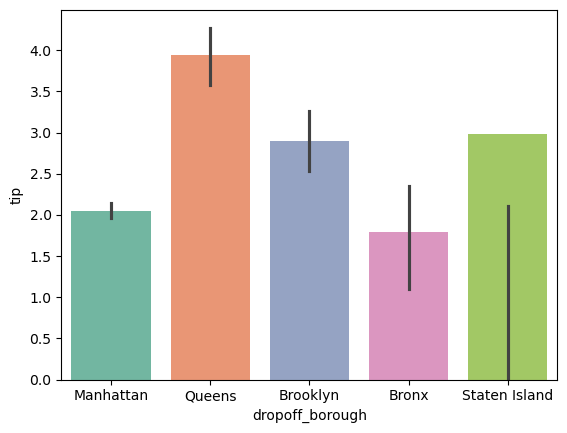

In [41]:
sns.barplot(x=df.dropoff_borough,y=df.tip,palette='Set2',estimator='std')

In [42]:
print(df['tip'].groupby(df['dropoff_borough']).mean())
df['tip'].groupby(df['dropoff_borough']).std()

dropoff_borough
Bronx             0.534706
Brooklyn          1.921590
Manhattan         1.964321
Queens            2.422022
Staten Island    14.165000
Name: tip, dtype: float64


dropoff_borough
Bronx            1.788795
Brooklyn         2.896229
Manhattan        2.052074
Queens           3.947016
Staten Island    2.976920
Name: tip, dtype: float64

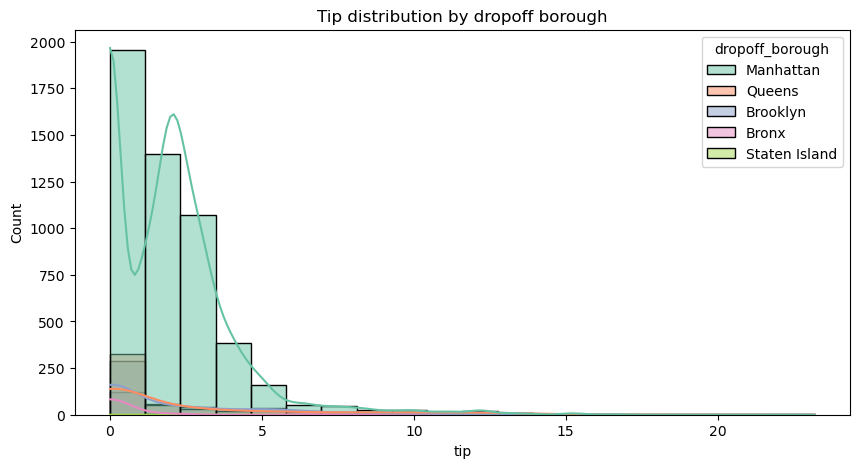

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data=df, x="tip", hue="dropoff_borough",palette='Set2',bins=20, kde=True )
plt.title("Tip distribution by dropoff borough")
plt.show()

In [44]:
manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
staten_island_tip=df['tip'][df['dropoff_borough']=='Staten Island']
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip,staten_island_tip)
print("F-statistic:",f_stat)
print("P value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:tip differs by dropoff borough")
else:
  print("Fail to reject null hypothesis: No significant tip difference by dropoff borough")

F-statistic: 31.424177966968262
P value: 5.87859571331583e-26
Reject null hypothesis:tip differs by dropoff borough


In [45]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.05)
print(tukey_result)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


In [46]:
print(df.pickup_zone.value_counts())
df.dropoff_zone.value_counts()

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
                               ... 
Ozone Park                        1
Glendale                          1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: int64


dropoff_zone
Upper East Side North    244
Murray Hill              217
Midtown Center           215
Midtown East             175
Upper East Side South    173
                        ... 
Queensboro Hill            1
Homecrest                  1
Madison                    1
Morrisania/Melrose         1
Brooklyn Navy Yard         1
Name: count, Length: 203, dtype: int64

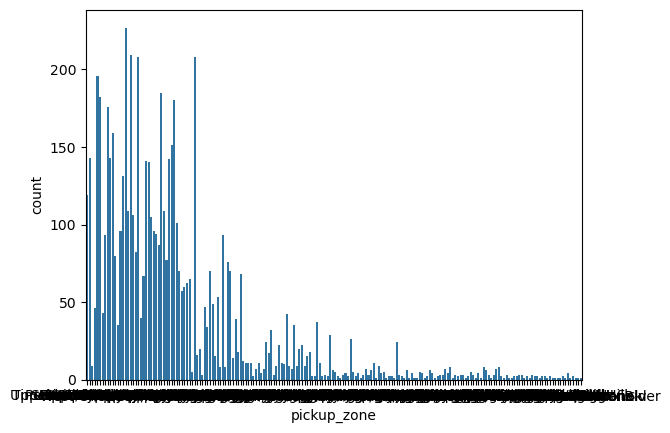

In [47]:
sns.countplot(x=df['pickup_zone'])
plt.show()

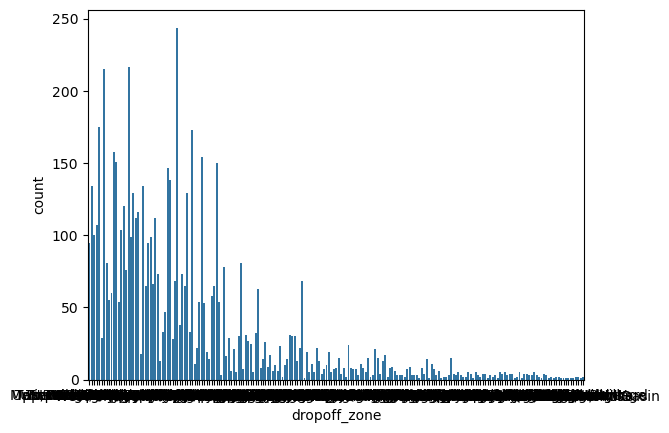

In [48]:
sns.countplot(x=df['dropoff_zone'])
plt.show()

In [49]:
regions = [group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by pickup_zone")
else:

    print("Fail to reject null hypothesis: No significant difference by pickup_zone")



ANOVA F-statistic: 7.563376210961905
P-value: 7.892434822142503e-169
Reject null hypothesis: tip differs by pickup_zone


In [50]:
regions = [group['tip'].values for name, group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by dropoff_zone")
else:

    print("Fail to reject null hypothesis: No significant difference by dropoff_zone")



ANOVA F-statistic: 5.769034673275405
P-value: 1.3107168403750418e-120
Reject null hypothesis: tip differs by dropoff_zone


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

<Axes: xlabel='tip', ylabel='Count'>

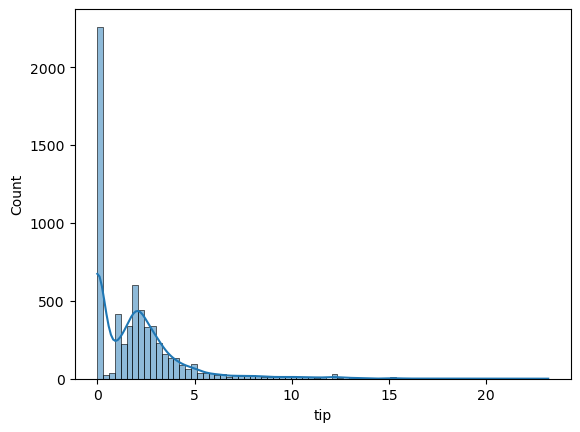

In [52]:
sns.histplot(df['tip'],kde=True)

<Axes: xlabel='passengers', ylabel='Count'>

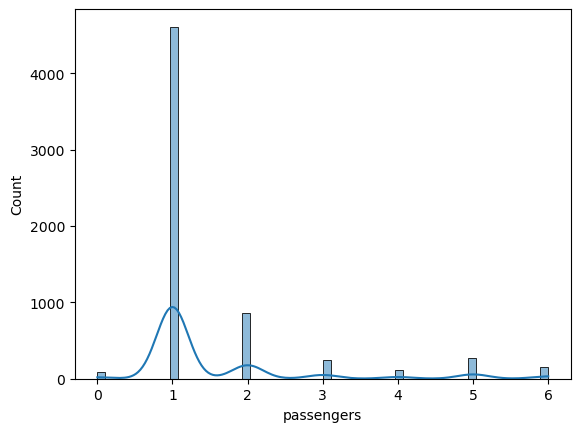

In [53]:
sns.histplot(df['passengers'],kde=True)

<Axes: xlabel='passengers', ylabel='tip'>

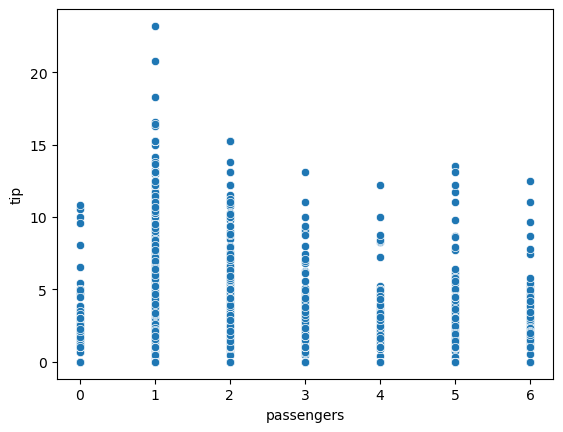

In [54]:
sns.scatterplot(y=df.tip,x=df.passengers)

In [55]:
r,p_val=stats.spearmanr(df['tip'],df['passengers'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.027509812818779178
p_value: 0.028480753176042872
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='fare', ylabel='Count'>

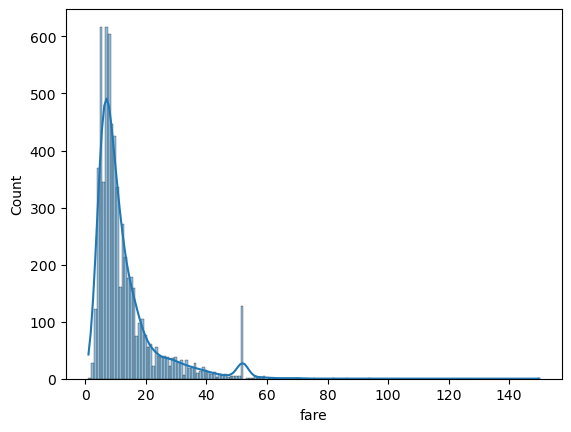

In [56]:
sns.histplot(df['fare'],kde=True)

<Axes: xlabel='fare', ylabel='tip'>

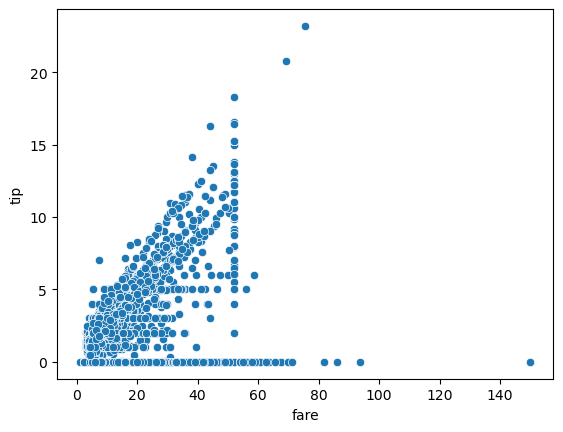

In [57]:
sns.scatterplot(y=df.tip,x=df.fare)

In [58]:
r,p_val=stats.spearmanr(df['tip'],df['fare'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.310254279563729
p_value: 1.5556730728881364e-141
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='distance', ylabel='Count'>

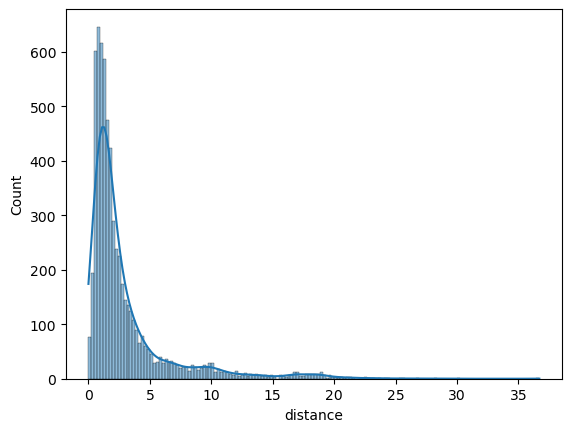

In [59]:
sns.histplot(df['distance'],kde=True)

<Axes: xlabel='distance', ylabel='tip'>

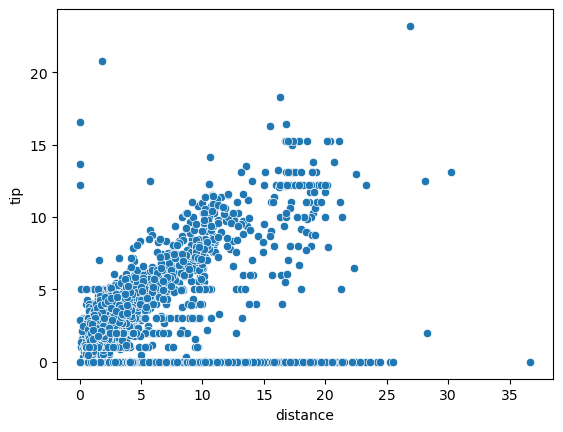

In [60]:
sns.scatterplot(y=df.tip,x=df.distance)

In [61]:
r,p_val=stats.spearmanr(df['tip'],df['distance'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.29265085410043695
p_value: 1.9411181331374707e-125
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='tolls', ylabel='Count'>

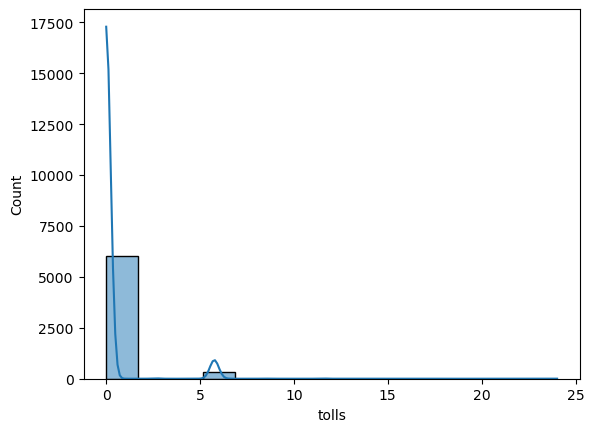

In [62]:
sns.histplot(df['tolls'],kde=True)

<Axes: xlabel='tolls', ylabel='tip'>

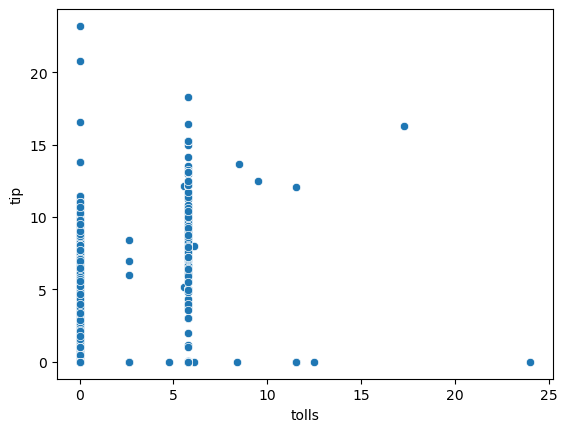

In [63]:
sns.scatterplot(y=df.tip,x=df.tolls)

In [64]:
r,p_val=stats.spearmanr(df['tip'],df['tolls'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.175380002891528
p_value: 5.643276180955435e-45
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: xlabel='total', ylabel='Count'>

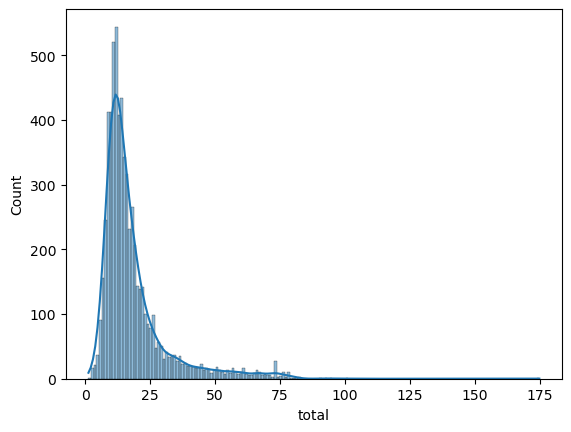

In [65]:
sns.histplot(df['total'],kde=True)

<Axes: xlabel='total', ylabel='tip'>

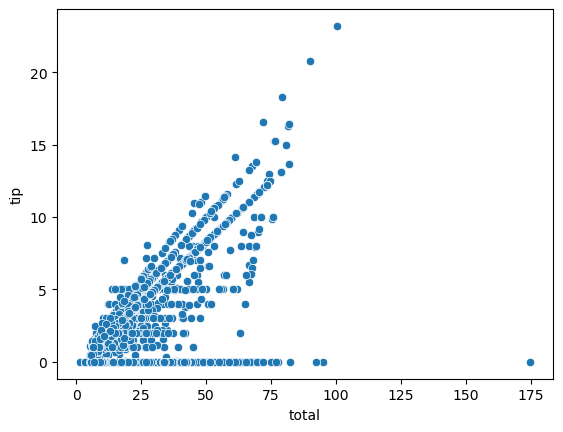

In [66]:
sns.scatterplot(x=df.total,y=df.tip)

In [67]:
r,p_val=stats.spearmanr(df['tip'],df['total'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.5028299699182296
p_value: 0.0
Reject null hypothesis:correlation is zero or there is no relationship b/w them


<Axes: >

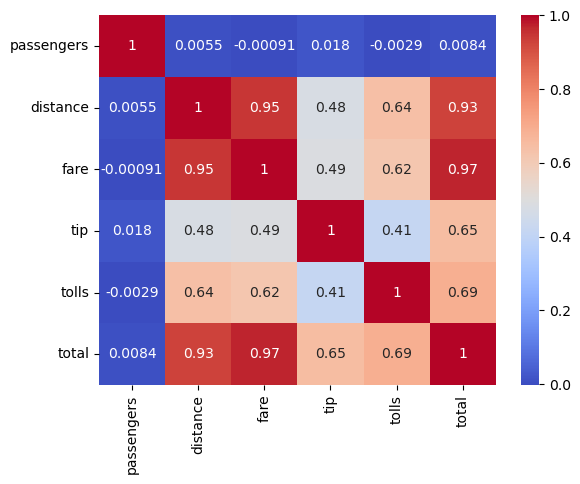

In [68]:


sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

<Axes: >

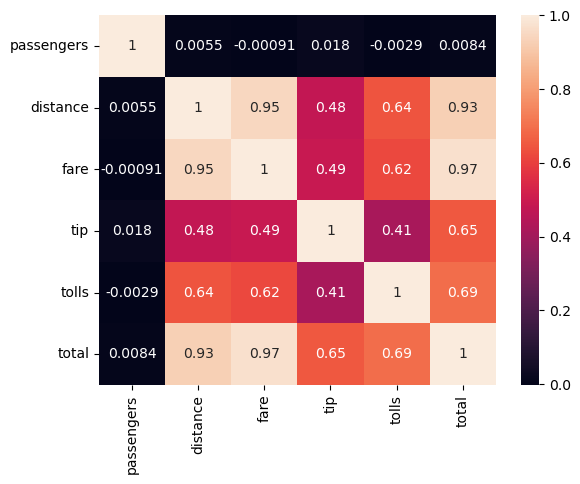

In [69]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

# Analysis with DateTime variables

In [70]:
df['pickup']

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6336   2019-03-31 09:51:53
6337   2019-03-31 17:38:00
6338   2019-03-23 22:55:18
6339   2019-03-04 10:09:25
6340   2019-03-13 19:31:22
Name: pickup, Length: 6341, dtype: datetime64[ns]

In [71]:
print(df['pickup'].dt.day)#date
print(df['pickup'].dt.month) #month
print(df['pickup'].dt.year) #year
print(df['pickup'].dt.hour) #hour
print(df['pickup'].dt.quarter) #which quarter of the year
print(df['pickup'].dt.day_name()) #day of the week

0       23
1        4
2       27
3       10
4       30
        ..
6336    31
6337    31
6338    23
6339     4
6340    13
Name: pickup, Length: 6341, dtype: int32
0       3
1       3
2       3
3       3
4       3
       ..
6336    3
6337    3
6338    3
6339    3
6340    3
Name: pickup, Length: 6341, dtype: int32
0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6336    2019
6337    2019
6338    2019
6339    2019
6340    2019
Name: pickup, Length: 6341, dtype: int32
0       20
1       16
2       17
3        1
4       13
        ..
6336     9
6337    17
6338    22
6339    10
6340    19
Name: pickup, Length: 6341, dtype: int32
0       1
1       1
2       1
3       1
4       1
       ..
6336    1
6337    1
6338    1
6339    1
6340    1
Name: pickup, Length: 6341, dtype: int32
0        Saturday
1          Monday
2       Wednesday
3          Sunday
4        Saturday
          ...    
6336       Sunday
6337       Sunday
6338     Saturday
6339       Monday
6340    We

In [72]:
len(df['pickup'].unique())

6322

In [73]:
df['pickup_month']=df['pickup'].dt.month_name()
df['pickup_year']=df['pickup'].dt.year
df['pickup_day']=df['pickup'].dt.day
df['pickup_dayname']=df['pickup'].dt.day_name()
df['pickup_hour']=df['pickup'].dt.hour
df['pickup_minute']=df['pickup'].dt.minute
df['pickup_second']=df['pickup'].dt.second
df.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,dropoff_zone,pickup_borough,dropoff_borough,pickup_month,pickup_year,pickup_day,pickup_dayname,pickup_hour,pickup_minute,pickup_second
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,UN/Turtle Bay South,Manhattan,Manhattan,March,2019,23,Saturday,20,21,9
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,Upper West Side South,Manhattan,Manhattan,March,2019,4,Monday,16,11,55
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,West Village,Manhattan,Manhattan,March,2019,27,Wednesday,17,53,1
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,March,2019,10,Sunday,1,23,59
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,Yorkville West,Manhattan,Manhattan,March,2019,30,Saturday,13,27,42


In [74]:
df.pickup_month.value_counts()

pickup_month
March       6340
February       1
Name: count, dtype: int64

In [75]:
df['dropoff']

0      2019-03-23 20:27:24
1      2019-03-04 16:19:00
2      2019-03-27 18:00:25
3      2019-03-10 01:49:51
4      2019-03-30 13:37:14
               ...        
6336   2019-03-31 09:55:27
6337   2019-03-31 18:34:23
6338   2019-03-23 23:14:25
6339   2019-03-04 10:14:29
6340   2019-03-13 19:48:02
Name: dropoff, Length: 6341, dtype: datetime64[ns]

In [76]:
print(df['dropoff'].dt.day)#date
print(df['dropoff'].dt.month) #month
print(df['dropoff'].dt.year) #year
print(df['dropoff'].dt.hour) #hour
print(df['dropoff'].dt.quarter) #which quarter of the year
print(df['dropoff'].dt.day_name()) #day of the week

0       23
1        4
2       27
3       10
4       30
        ..
6336    31
6337    31
6338    23
6339     4
6340    13
Name: dropoff, Length: 6341, dtype: int32
0       3
1       3
2       3
3       3
4       3
       ..
6336    3
6337    3
6338    3
6339    3
6340    3
Name: dropoff, Length: 6341, dtype: int32
0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6336    2019
6337    2019
6338    2019
6339    2019
6340    2019
Name: dropoff, Length: 6341, dtype: int32
0       20
1       16
2       18
3        1
4       13
        ..
6336     9
6337    18
6338    23
6339    10
6340    19
Name: dropoff, Length: 6341, dtype: int32
0       1
1       1
2       1
3       1
4       1
       ..
6336    1
6337    1
6338    1
6339    1
6340    1
Name: dropoff, Length: 6341, dtype: int32
0        Saturday
1          Monday
2       Wednesday
3          Sunday
4        Saturday
          ...    
6336       Sunday
6337       Sunday
6338     Saturday
6339       Monday
6340 

In [77]:
len(df['dropoff'].unique())

6333

In [78]:
df['dropoff_month']=df['dropoff'].dt.month_name()
df['dropoff_year']=df['dropoff'].dt.year
df['dropoff_day']=df['dropoff'].dt.day
df['dropoff_dayname']=df['dropoff'].dt.day_name()
df['dropoff_hour']=df['dropoff'].dt.hour
df['dropoff_minute']=df['dropoff'].dt.minute
df['dropoff_second']=df['dropoff'].dt.second
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_year,dropoff_day,dropoff_dayname,dropoff_hour,dropoff_minute,dropoff_second
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,20,21,9,March,2019,23,Saturday,20,27,24
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,16,11,55,March,2019,4,Monday,16,19,0
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,17,53,1,March,2019,27,Wednesday,18,0,25
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,...,1,23,59,March,2019,10,Sunday,1,49,51
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,...,13,27,42,March,2019,30,Saturday,13,37,14


In [79]:
df.shape

(6341, 28)

<Axes: xlabel='pickup_year', ylabel='tip'>

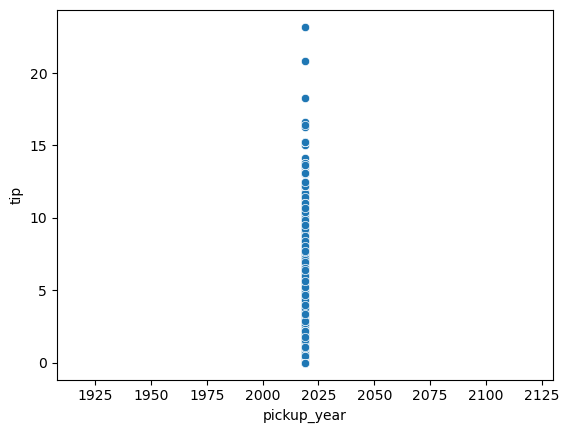

In [80]:
sns.scatterplot(x=df.pickup_year,y=df.tip)

In [81]:
r,p_val=stats.spearmanr(df['tip'],df['pickup_year'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: nan
p_value: nan
Fail to reject null hypothesis:there is a significant relationship b/w them


C:\Users\dobil\AppData\Local\Temp\ipykernel_22292\2584283428.py:1: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r,p_val=stats.spearmanr(df['tip'],df['pickup_year'])


In [82]:
df['pickup_day'].value_counts()

pickup_day
14    258
6     255
13    240
1     236
20    233
27    230
8     229
5     228
22    225
16    220
21    218
7     217
12    212
30    209
23    206
11    205
29    204
28    203
9     199
15    197
19    194
2     194
31    186
10    182
17    177
26    177
4     170
18    170
3     167
25    155
24    145
Name: count, dtype: int64

<Axes: xlabel='pickup_day', ylabel='tip'>

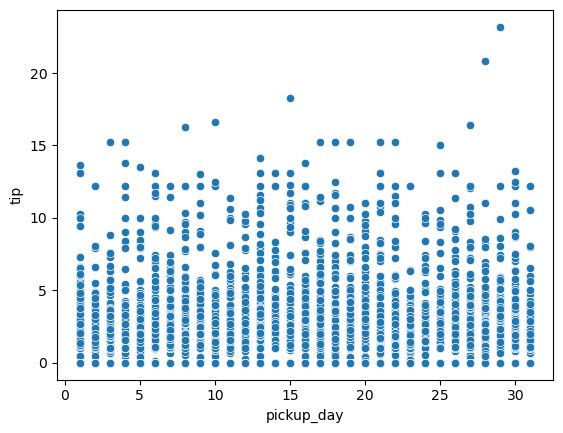

In [83]:
sns.scatterplot(x=df.pickup_day,y=df.tip)

In [84]:
print(df['pickup_day'].skew())
df['pickup_day'].kurtosis()

0.04994570013687315


np.float64(-1.1765713733562717)

In [85]:
r,p_val=stats.pearsonr(df['tip'],df['pickup_day'])
print("Correlation:",r)
print("p_value:",p_val)
if p_val<0.05:
  print("Reject null hypothesis:correlation is zero or there is no relationship b/w them")
else:
  print("Fail to reject null hypothesis:there is a significant relationship b/w them")

Correlation: 0.017688607674598046
p_value: 0.15901759485800118
Fail to reject null hypothesis:there is a significant relationship b/w them


In [86]:
df['pickup_dayname'].value_counts()

pickup_dayname
Friday       1091
Saturday     1028
Wednesday     958
Thursday      896
Sunday        857
Tuesday       811
Monday        700
Name: count, dtype: int64

In [87]:
regions = [group['tip'].values for name, group in df.groupby('pickup_dayname')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by pickup_dayname")
else:

    print("Fail to reject null hypothesis: No significant difference by pickup_dayname")

ANOVA F-statistic: 1.6689152148182236
P-value: 0.1242843162257308
Fail to reject null hypothesis: No significant difference by pickup_dayname


In [88]:
df['pickup_hour'].value_counts()

pickup_hour
18    417
19    398
17    384
20    365
14    356
21    353
12    330
16    330
15    323
10    323
9     316
22    315
13    314
8     312
23    292
11    288
7     217
0     198
6     134
1     109
2      97
3      65
4      55
5      50
Name: count, dtype: int64

In [89]:
print(df['pickup_hour'].skew())
df['pickup_hour'].kurtosis()

-0.48079237828578225


np.float64(-0.5336286870692848)

In [90]:

r, p_val = stats.spearmanr(df['tip'], df['pickup_hour'])

print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")


Spearman correlation: 0.05620765514999495
p_value: 7.517078284119937e-06
Reject H0


In [91]:
# pickup_minute
r, p_val = stats.spearmanr(df['tip'], df['pickup_minute'])

print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")


Spearman correlation: -0.025529816477253938
p_value: 0.042064656129552166
Reject H0


In [92]:

r, p_val = stats.spearmanr(df['tip'], df['pickup_second'])
print("Feature: pickup_second")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")


Feature: pickup_second
Spearman correlation: 0.004860079566967875
p_value: 0.6988035530992044
Fail to reject H0


In [93]:
# dropoff_year
r, p_val = stats.spearmanr(df['tip'], df['dropoff_year'])
print("Feature: dropoff_year")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")

Feature: dropoff_year
Spearman correlation: nan
p_value: nan
Fail to reject H0


C:\Users\dobil\AppData\Local\Temp\ipykernel_22292\27861650.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p_val = stats.spearmanr(df['tip'], df['dropoff_year'])


In [94]:
# dropoff_month
r, p_val = stats.spearmanr(df['tip'], df['dropoff_month'])
print("Feature: dropoff_month")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")


Feature: dropoff_month
Spearman correlation: 0.020335649124909806
p_value: 0.10540768600172555
Fail to reject H0


In [95]:
# dropoff_day
r, p_val = stats.spearmanr(df['tip'], df['dropoff_day'])
print("Feature: dropoff_day")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")

Feature: dropoff_day
Spearman correlation: 0.010829999394669469
p_value: 0.38854863611464274
Fail to reject H0


In [96]:
# dropoff_hour
r, p_val = stats.spearmanr(df['tip'], df['dropoff_hour'])
print("Feature: dropoff_hour")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")


Feature: dropoff_hour
Spearman correlation: 0.056776702660829036
p_value: 6.0707751854063095e-06
Reject H0


In [97]:

# dropoff_minute
r, p_val = stats.spearmanr(df['tip'], df['dropoff_minute'])
print("Feature: dropoff_minute")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")

Feature: dropoff_minute
Spearman correlation: -0.006782156904046719
p_value: 0.5892207712099395
Fail to reject H0


In [98]:
# dropoff_second
r, p_val = stats.spearmanr(df['tip'], df['dropoff_second'])
print("Feature: dropoff_second")
print("Spearman correlation:", r)
print("p_value:", p_val)
print("Reject H0" if p_val < 0.05 else "Fail to reject H0")

Feature: dropoff_second
Spearman correlation: -0.001584000947940426
p_value: 0.8996449823973446
Fail to reject H0


In [99]:
# dropoff_dayname
d = df[['tip','dropoff_dayname']].dropna()
groups = [g['tip'].values for _, g in d.groupby('dropoff_dayname')]
stat, p_val = stats.kruskal(*groups) 
print("Kruskal statistic:", stat)
print("p_value:", p_val)
if p_val < 0.05:
    print("Reject H0: at least one dayname group differs in tip")
else:
    print("Fail to reject H0: no evidence of difference across dayname groups")


Kruskal statistic: 11.42559892527446
p_value: 0.07608034328747931
Fail to reject H0: no evidence of difference across dayname groups


In [ ]:
import pandas as pd
from scipy import stats

alpha = 0.05
NORMAL_RANGE = 1.0  # [-1, +1] rule-of-thumb for skew/kurtosis [web:137]
target = "tip"

numeric_time_cols = [
    "pickup_year","pickup_day","pickup_hour","pickup_minute","pickup_second",
    "dropoff_year","dropoff_day","dropoff_hour","dropoff_minute","dropoff_second",
]

def roughly_normal(s, r=NORMAL_RANGE):
    s = pd.Series(s).dropna()
    if len(s) < 8:
        return False
    return (abs(s.skew()) <= r) and (abs(s.kurtosis()) <= r)  # excess kurtosis [web:137]

keep_cols, delete_cols = [], []

for col in numeric_time_cols:
    d = df[[target, col]].dropna()
    x, y = d[col], d[target]

    if roughly_normal(x) and roughly_normal(y):
        stat, p_val = stats.pearsonr(x, y)   # Pearson [web:145]
        test = "Pearson"
    else:
        stat, p_val = stats.spearmanr(x, y)  # Spearman [web:141]
        test = "Spearman"

    print(f"{col:14s}  test={test:8s}  stat={stat: .4f}  p={p_val: .4g}")

    if p_val < alpha:
        keep_cols.append(col)
    else:
        delete_cols.append(col)

print("\nDELETE so far:", delete_cols)


pickup_year     test=Spearman  stat= nan  p= nan
pickup_day      test=Spearman  stat= 0.0100  p= 0.4261
pickup_hour     test=Spearman  stat= 0.0562  p= 7.517e-06
pickup_minute   test=Spearman  stat=-0.0255  p= 0.04206
pickup_second   test=Spearman  stat= 0.0049  p= 0.6988
dropoff_year    test=Spearman  stat= nan  p= nan
dropoff_day     test=Spearman  stat= 0.0108  p= 0.3885
dropoff_hour    test=Spearman  stat= 0.0568  p= 6.071e-06
dropoff_minute  test=Spearman  stat=-0.0068  p= 0.5892
dropoff_second  test=Spearman  stat=-0.0016  p= 0.8996

DELETE so far: ['pickup_year', 'pickup_day', 'pickup_second', 'dropoff_year', 'dropoff_day', 'dropoff_minute', 'dropoff_second']


C:\Users\dobil\AppData\Local\Temp\ipykernel_25160\2570584862.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  stat, p_val = stats.spearmanr(x, y)  # Spearman [web:141]
C:\Users\dobil\AppData\Local\Temp\ipykernel_25160\2570584862.py:29: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  stat, p_val = stats.spearmanr(x, y)  # Spearman [web:141]


In [ ]:
from scipy import stats

cat_cols = ["pickup_month","dropoff_month","pickup_dayname","dropoff_dayname"]

for col in cat_cols:
    d = df[[target, col]].dropna()
    groups = [g[target].values for _, g in d.groupby(col)]
    stat, p_val = stats.kruskal(*groups)  # Kruskal–Wallis [web:158]

    print(f"{col:14s}  test=Kruskal  stat={stat: .4f}  p={p_val: .4g}")

    if p_val >= alpha:
        delete_cols.append(col)
    else:
        keep_cols.append(col)

print("\nFINAL KEEP:", keep_cols)
print("FINAL DELETE:", delete_cols)


pickup_month    test=Kruskal  stat= 1.3107  p= 0.2523
dropoff_month   test=Kruskal  stat= 2.6218  p= 0.2696
pickup_dayname  test=Kruskal  stat= 11.6682  p= 0.06979
dropoff_dayname  test=Kruskal  stat= 11.4256  p= 0.07608

FINAL KEEP: []
FINAL DELETE: ['pickup_year', 'pickup_month', 'dropoff_month', 'pickup_dayname', 'dropoff_dayname']


In [ ]:
cols_to_delete = [
    'pickup_year', 'pickup_day', 'pickup_second',
    'dropoff_year', 'dropoff_day', 'dropoff_minute', 'dropoff_second',
    'pickup_month', 'dropoff_month', 'pickup_dayname', 'dropoff_dayname'
]

# check which are really present
existing = [c for c in cols_to_delete if c in df.columns]
missing  = [c for c in cols_to_delete if c not in df.columns]

print("Will drop:", existing)
print("Not found (check spelling/spaces):", missing)

df = df.drop(columns=existing)   # drop columns (axis=1) [web:184]


Will drop: ['pickup_year', 'pickup_day', 'pickup_second', 'dropoff_year', 'dropoff_day', 'dropoff_minute', 'dropoff_second', 'pickup_month', 'dropoff_month', 'pickup_dayname', 'dropoff_dayname']
Not found (check spelling/spaces): []


In [ ]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_minute,dropoff_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,21,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,11,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,53,18
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,23,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,27,13


In [ ]:
df.shape

(6341, 17)

In [ ]:
df = df.drop(columns=cols_to_delete, errors="ignore")


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    "color", "payment",
    "pickup_zone", "dropoff_zone",
    "pickup_borough", "dropoff_borough"
]

df_enc = df.copy()
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))
    encoders[col] = le

df_enc.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_minute,dropoff_hour
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,1,1,99,176,2,2,20,21,20
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,1,0,174,182,2,2,16,11,16
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,1,1,1,190,2,2,17,53,18
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,1,1,86,202,2,2,1,23,1
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,1,1,116,202,2,2,13,27,13


In [ ]:
for col, le in encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(col, mapping)


color {'green': np.int64(0), 'yellow': np.int64(1)}
payment {'cash': np.int64(0), 'credit card': np.int64(1)}
pickup_zone {'Allerton/Pelham Gardens': np.int64(0), 'Alphabet City': np.int64(1), 'Astoria': np.int64(2), 'Auburndale': np.int64(3), 'Battery Park': np.int64(4), 'Battery Park City': np.int64(5), 'Bay Ridge': np.int64(6), 'Bayside': np.int64(7), 'Bedford': np.int64(8), 'Bedford Park': np.int64(9), 'Belmont': np.int64(10), 'Bensonhurst East': np.int64(11), 'Bensonhurst West': np.int64(12), 'Bloomingdale': np.int64(13), 'Boerum Hill': np.int64(14), 'Borough Park': np.int64(15), 'Briarwood/Jamaica Hills': np.int64(16), 'Brighton Beach': np.int64(17), 'Bronx Park': np.int64(18), 'Bronxdale': np.int64(19), 'Brooklyn Heights': np.int64(20), 'Brownsville': np.int64(21), 'Bushwick North': np.int64(22), 'Bushwick South': np.int64(23), 'Cambria Heights': np.int64(24), 'Canarsie': np.int64(25), 'Carroll Gardens': np.int64(26), 'Central Harlem': np.int64(27), 'Central Harlem North': np.in

In [ ]:
df2 = df.copy()

# numeric feature from timestamps
df2["trip_minutes"] = (df2["dropoff"] - df2["pickup"]).dt.total_seconds() / 60

# drop datetime columns (prevents dtype promotion error)
df2 = df2.drop(columns=["pickup", "dropoff"])


In [ ]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=["tip"])
y = df2["tip"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=["number"]).columns

scaler = StandardScaler()  # [web:242]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [ ]:
X_train.dtypes


passengers         float64
distance           float64
fare               float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
pickup_hour        float64
pickup_minute      float64
dropoff_hour       float64
trip_minutes       float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    "color","payment",
    "pickup_zone","dropoff_zone",
    "pickup_borough","dropoff_borough"
]

X_train_enc = X_train.copy()
X_test_enc  = X_test.copy()

encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train_enc[col].astype(str))
    encoders[col] = le

    # handle unseen categories in test: map unknown -> -1
    mapping = {cls: i for i, cls in enumerate(le.classes_)}
    X_test_enc[col] = X_test_enc[col].astype(str).map(mapping).fillna(-1).astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train_enc.select_dtypes(include=["number"]).columns

scaler = StandardScaler()  # [web:242]
X_train_enc[num_cols] = scaler.fit_transform(X_train_enc[num_cols])
X_test_enc[num_cols]  = scaler.transform(X_test_enc[num_cols])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

model = LinearRegression()
model.fit(X_train_enc, y_train)

y_pred = model.predict(X_test_enc)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)


MSE: 0.3868207445668572
RMSE: 0.6219491495024791
R2: 0.9266412314285615


In [ ]:
# polynomial regression for tips dataset1